In [1]:
#Import Libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
pd.options.display.max_columns=40

### Import Descision Tree Classifier
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
# Basic imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
### Load 
path_hw7="C:\\Users\\fbaharkoush\\IE 598 Machine Learning\\Homework\\HW 7\\"
df_ts=pd.read_csv(path_hw7+"ccdefault.csv").drop("ID",axis=1)
### Missing Values
df_ts.isnull().sum().sum()==0

True

In [3]:
## Values
X=df_ts.drop("DEFAULT",axis=1).values
y=df_ts["DEFAULT"].values

# ## Values scaled
# X=scale(df_ts.drop("DEFAULT",axis=1).values)
# y=df_ts["DEFAULT"].values

### Part 1: Random forest estimators
Fit a random forest model, try several different values for N_estimators, report in-sample accuracies. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=39)

In [5]:
### Random Forest Parameters
prameters_for_rfc={'n_estimators': [100,200,300,400,500],
          'criterion':['gini','entropy']}

In [6]:
# ### Random Forest Parameters
# prameters_for_rfc={'n_estimators': [6000],
#           'criterion':['entropy']}

In [7]:
### Initiate Random Forest Model With Max Depth=2
random_forest_classsifier_model=RandomForestClassifier(random_state=32,max_depth=2)

### Initiate Random Forest Model with 10 Fold Cross Validation
random_forest_classsifier_model_gridcv=GridSearchCV(estimator=random_forest_classsifier_model,param_grid=prameters_for_rfc,
                                                cv=10,
                                               scoring='roc_auc')

### Fit Random Forest Model with Cross Validation
random_forest_classsifier_model_gridcv.fit(X_train,y_train)

### Get the Best Score of the cross validate model
random_forest_classsifier_model_gridcv.best_score_

0.7701609142583414

In [8]:
print("Best Random Forest Model is the one with the following Parameters",random_forest_classsifier_model_gridcv.best_params_)

Best Random Forest Model is the one with the following Parameters {'criterion': 'gini', 'n_estimators': 100}


### Selecting best model 

In [9]:
random_forest_classsifier_model_with_best_param=random_forest_classsifier_model_gridcv.best_estimator_
random_forest_classsifier_model_gridcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

#### In Sample Accuracy (Train)

In [10]:
### Fit to the best Model
random_forest_classsifier_model_with_best_param.fit(X_train,y_train)
### Training set prediction 
y_pred_train=random_forest_classsifier_model_with_best_param.predict(X_train)
### Training set ROC Score 
print("ROC Sccore of the best model on Training Set",roc_auc_score(y_train,y_pred_train))

ROC Sccore of the best model on Training Set 0.5737034538150259


#### Out Sample Accuracy (Test)

In [11]:
y_pred_test=random_forest_classsifier_model_with_best_param.predict(X_test)
print("ROC AUC Sccore of the best model on Test Set",roc_auc_score(y_test,y_pred_test))

ROC AUC Sccore of the best model on Test Set 0.5730674218700879


In [12]:
random_forest_classsifier_model_with_best_param.feature_importances_

array([2.17658478e-02, 0.00000000e+00, 8.27397065e-04, 1.21697370e-04,
       4.87271629e-04, 2.98648620e-01, 2.20600102e-01, 1.12023642e-01,
       9.51834027e-02, 7.44340767e-02, 7.71084016e-02, 1.90629388e-03,
       7.36088849e-05, 1.85650646e-03, 8.72047354e-04, 4.28428133e-04,
       8.99267984e-04, 3.14764629e-02, 2.49779561e-02, 9.83123807e-03,
       1.08490776e-02, 1.00608539e-02, 5.56780018e-03])

### Part 2: Random forest feature importance

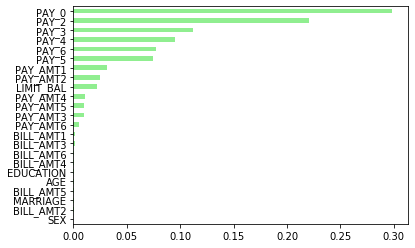

In [13]:
importances_rf=pd.Series(random_forest_classsifier_model_with_best_param.feature_importances_,
          index = df_ts.drop("DEFAULT",axis=1).columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

In [14]:
print("accuracy score on Test",accuracy_score(y_test,y_pred_test))
print("accuracy score on Train",accuracy_score(y_train,y_pred_train))

accuracy score on Test 0.8033333333333333
accuracy score on Train 0.8022222222222222


In [89]:
random_forest_classsifier_model_gridcv.

0.9733967781066895

In [59]:
df_result_summary=pd.DataFrame(random_forest_classsifier_model_gridcv.cv_results_['params'])
df_result_summary["Mean Test Score %"]=(list(random_forest_classsifier_model_gridcv.cv_results_['mean_test_score']))
df_result_summary["Mean Test Score %"]=df_result_summary["Mean Test Score %"]*100

In [82]:
random_forest_classsifier_model_gridcv.cv_results_['params']

[{'criterion': 'gini', 'n_estimators': 100},
 {'criterion': 'gini', 'n_estimators': 200},
 {'criterion': 'gini', 'n_estimators': 300},
 {'criterion': 'gini', 'n_estimators': 400},
 {'criterion': 'gini', 'n_estimators': 500},
 {'criterion': 'entropy', 'n_estimators': 100},
 {'criterion': 'entropy', 'n_estimators': 200},
 {'criterion': 'entropy', 'n_estimators': 300},
 {'criterion': 'entropy', 'n_estimators': 400},
 {'criterion': 'entropy', 'n_estimators': 500}]

In [80]:
df_result_summary

,criterion,n_estimators,Mean Test Score %
0,gini,100,77.016091
1,gini,200,76.946355
2,gini,300,76.914094
3,gini,400,76.938530
4,gini,500,76.958080
5,entropy,100,76.990509
6,entropy,200,76.924416
7,entropy,300,76.893430
8,entropy,400,76.914389
9,entropy,500,76.917823


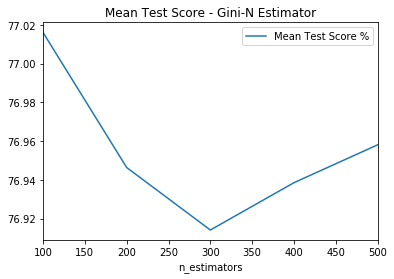

In [79]:
df_result_summary.query("criterion=='gini'").plot(x="n_estimators",y="Mean Test Score %",
                                                  title="Mean Test Score - Gini-N Estimator")

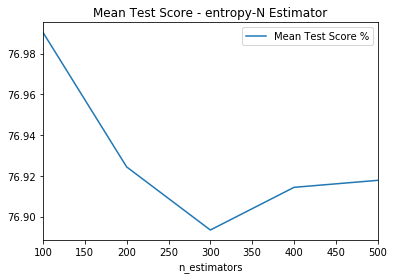

In [81]:
df_result_summary.query("criterion=='entropy'").plot(x="n_estimators",y="Mean Test Score %",
                                                  title="Mean Test Score - entropy-N Estimator")

### Final conclusion

Thea mean scores of all the models are very close to heach other. 
1. As the number of tree grows, the compution gets loner and longer. 
2. For this experiment 100 Tree is enough.
3. pay_0 is the most importnat feature.

4.according to  https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3
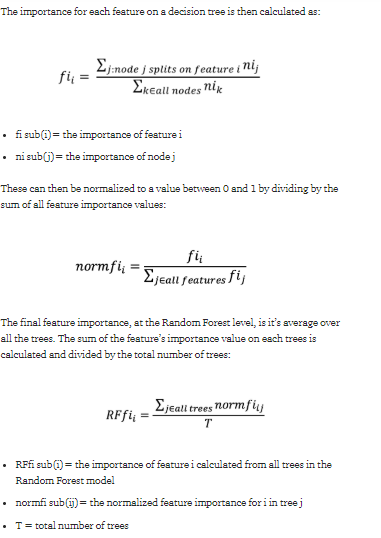

In [90]:
print("My name is Farbod Baharkoush")
print("My NetID is: fbahar2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Farbod Baharkoush
My NetID is: fbahar2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
